In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import classification_report,confusion_matrix
plt.style.use('seaborn')
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv('Spotify_Recommendation_System/data.csv')

In [8]:
df.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [9]:
df.shape

(195, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [11]:
df.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

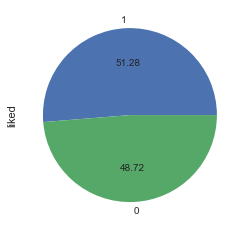

In [12]:
df['liked'].value_counts().plot(kind='pie',autopct='%.2f',)
plt.show()

<Figure size 1080x1080 with 0 Axes>

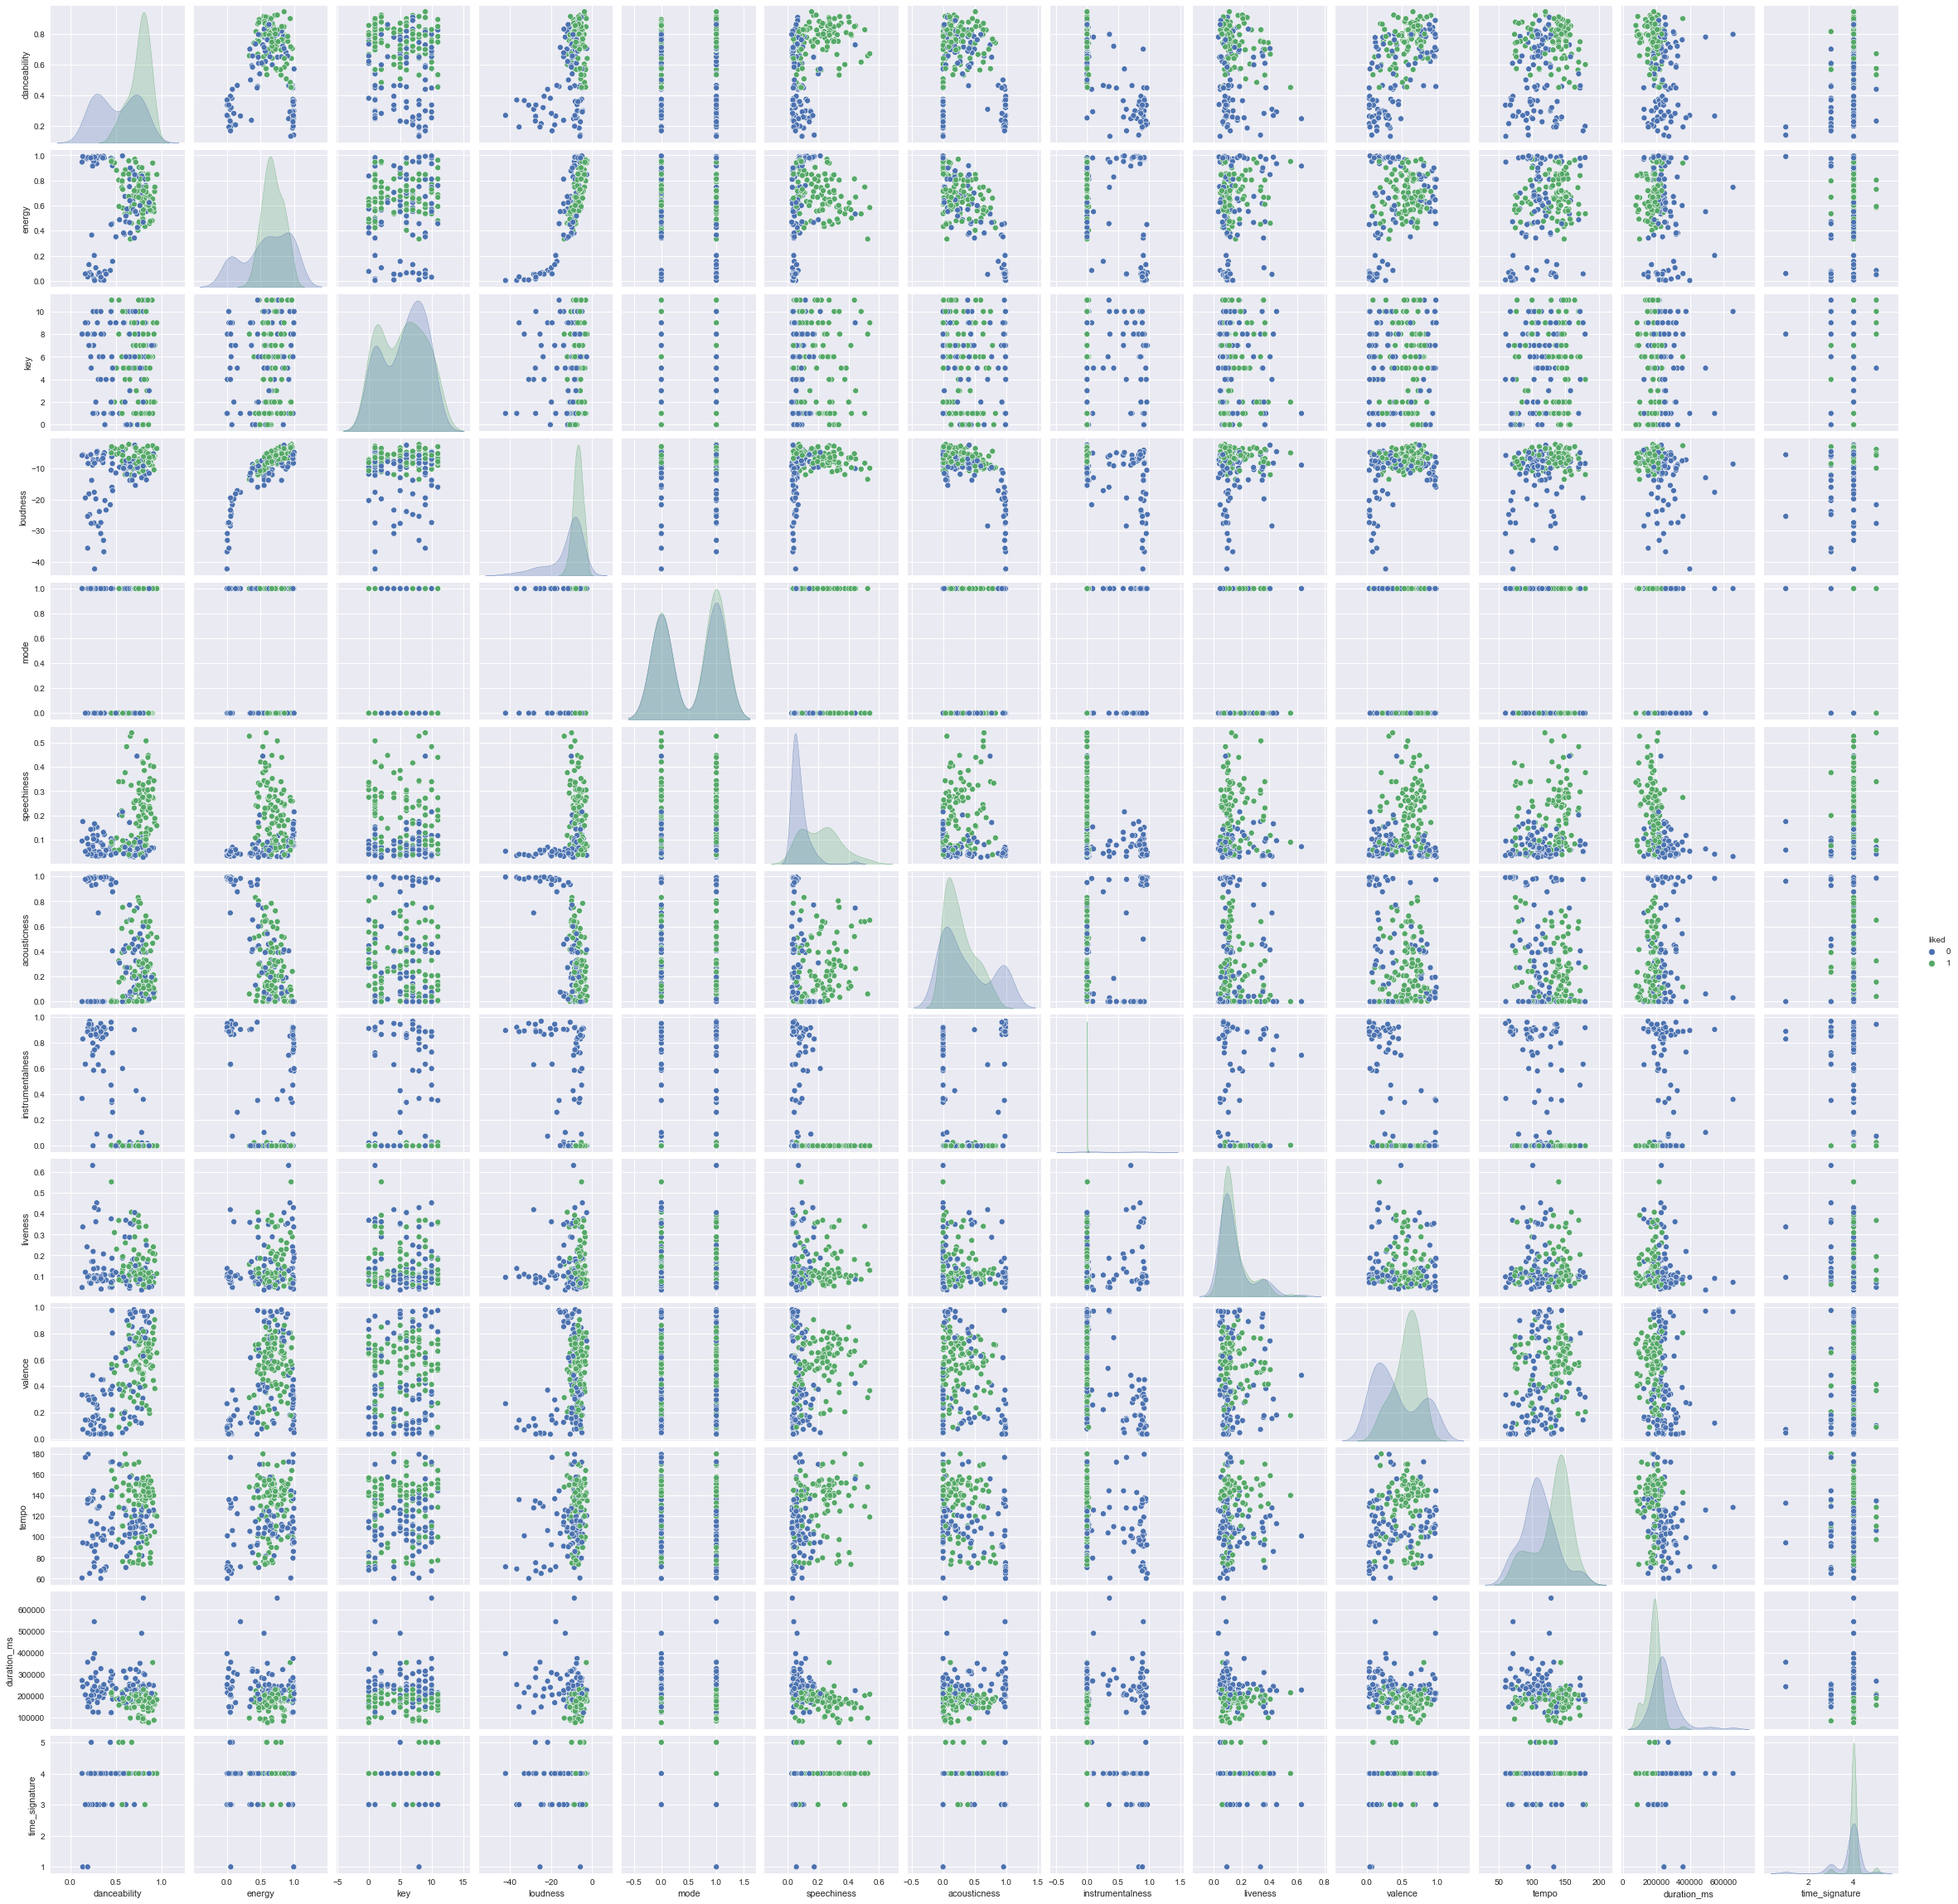

In [13]:
plt.figure(figsize=(15,15))
sns.pairplot(data=df, hue='liked')
plt.show()

In [14]:
std = StandardScaler()
scalled = std.fit_transform(df.drop('liked',axis=1))

In [15]:
i = 0 
for column in df.columns[:-1]:
    df[column] = scalled[:,i]
    i += 1

In [16]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.769903,-0.055628,0.441095,0.417562,-1.080123,-0.843078,0.412263,-0.554830,-0.458413,0.503237,-0.896670,1.266065,0.193658,0
1,0.580139,0.248888,1.321780,0.235180,-1.080123,1.307549,-0.353462,-0.556955,-0.541666,0.095009,1.079610,0.469229,0.193658,1
2,-1.738685,-2.403485,-1.320274,-2.772810,0.925820,-0.891369,2.103110,2.040507,-0.439492,-1.705687,-1.634621,1.022384,0.193658,0
3,0.395003,0.376091,-0.733151,0.382222,-1.080123,-0.753156,0.349755,-0.556952,-0.240821,0.330957,-1.114714,-0.062375,0.193658,1
4,0.695849,-0.256069,-1.320274,0.302018,0.925820,0.608158,-0.544112,-0.556955,-0.692088,0.574396,1.214835,-0.472381,0.193658,1


In [17]:
x, y = df.drop('liked',axis=1),df['liked']
x.shape, y.shape

((195, 13), (195,))

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train.shape ,x_test.shape ,y_train.shape ,y_test.shape

((136, 13), (59, 13), (136,), (59,))

In [19]:
y_train.value_counts()

0    68
1    68
Name: liked, dtype: int64

In [20]:
model = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13,), activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),

])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
    
)

In [21]:
model.fit(x_train, y_train, epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 11ms/step - loss: 0.8554 - accuracy: 0.5221
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8178 - accuracy: 0.5221
Epoch 3/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7847 - accuracy: 0.5588
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7582 - accuracy: 0.5735
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7335 - accuracy: 0.6029
Epoch 6/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7130 - accuracy: 0.6176
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.6324
Epoch 8/200
5/5 [==============================] - 0s 3ms/step - loss: 0.6769 - accuracy: 0.6544
Epoch 9/200
5/5 [==============================] - 0s 3ms/step - loss: 0.6621 - accuracy: 0.6691
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6464 - accuracy: 0.6618
Epoch 11/200
5/5 [==========

5/5 [==============================] - 0s 5ms/step - loss: 0.2188 - accuracy: 0.9191
Epoch 85/200
5/5 [==============================] - 0s 3ms/step - loss: 0.2166 - accuracy: 0.9191
Epoch 86/200
5/5 [==============================] - 0s 4ms/step - loss: 0.2148 - accuracy: 0.9191
Epoch 87/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2125 - accuracy: 0.9191
Epoch 88/200
5/5 [==============================] - 0s 1ms/step - loss: 0.2107 - accuracy: 0.9191
Epoch 89/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2087 - accuracy: 0.9191
Epoch 90/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2065 - accuracy: 0.9191
Epoch 91/200
5/5 [==============================] - 0s 3ms/step - loss: 0.2045 - accuracy: 0.9118
Epoch 92/200
5/5 [==============================] - 0s 3ms/step - loss: 0.2027 - accuracy: 0.9118
Epoch 93/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2007 - accuracy: 0.9118
Epoch 94/200
5/5 [===============

5/5 [==============================] - 0s 2ms/step - loss: 0.1071 - accuracy: 0.9779
Epoch 167/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1064 - accuracy: 0.9779
Epoch 168/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1056 - accuracy: 0.9779
Epoch 169/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1050 - accuracy: 0.9779
Epoch 170/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1040 - accuracy: 0.9779
Epoch 171/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1031 - accuracy: 0.9779
Epoch 172/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1024 - accuracy: 0.9779
Epoch 173/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1017 - accuracy: 0.9779
Epoch 174/200
5/5 [==============================] - ETA: 0s - loss: 0.1730 - accuracy: 0.96 - 0s 3ms/step - loss: 0.1011 - accuracy: 0.9779
Epoch 175/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1000 -

In [22]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 1000us/step - loss: 0.1198 - accuracy: 0.9153


[0.11979075521230698, 0.9152542352676392]

In [23]:
def predict(data):
    pred = model.predict(data).flatten()
    pred[pred >= 0.5] = 1
    pred[pred < 0.5] = 0
    return pred

def plot_cm(y_true,y_pred,title=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, fmt='g',cmap='YlGnBu')
    plt.title(title)
    plt.show()

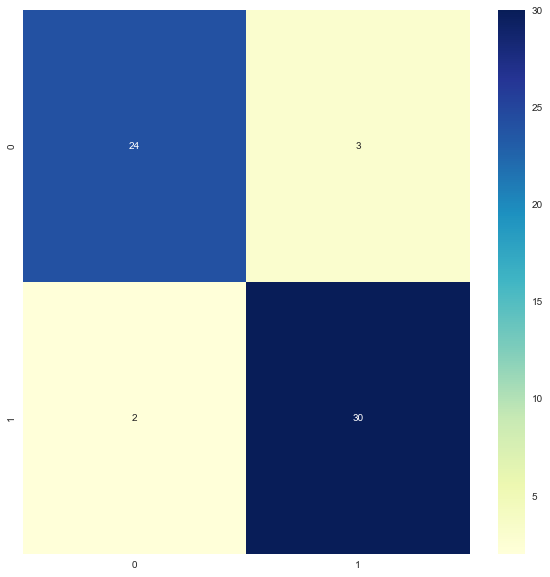

In [24]:
y_pred_test = predict(x_test)
plot_cm(y_test, y_pred_test)

In [25]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.91      0.94      0.92        32

    accuracy                           0.92        59
   macro avg       0.92      0.91      0.91        59
weighted avg       0.92      0.92      0.92        59



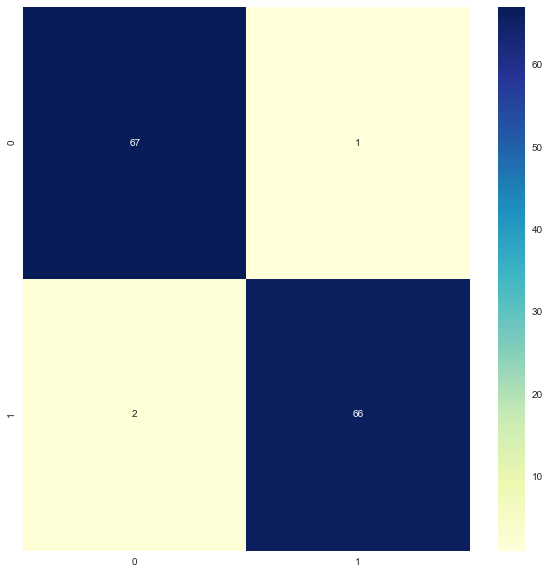

In [26]:
y_pred_train = predict(x_train)
plot_cm(y_train, y_pred_train)

In [27]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        68
           1       0.99      0.97      0.98        68

    accuracy                           0.98       136
   macro avg       0.98      0.98      0.98       136
weighted avg       0.98      0.98      0.98       136



In [29]:
model.save('model/Spotify_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model/Spotify_model\assets


In [30]:
df2 = pd.read_csv('Spotify_Recommendation_System/data.csv')
    
std2 = StandardScaler()
std2.fit(df2.drop('liked',axis=1))
print(std2.mean_)
print(std2.scale_)

[ 6.36656410e-01  6.38431487e-01  5.49743590e+00 -9.48163077e+00
  5.38461538e-01  1.48957436e-01  3.19093091e-01  1.92337256e-01
  1.48455385e-01  4.93631795e-01  1.21086174e+02  2.13408933e+05
  3.91282051e+00]
[2.16057827e-01 2.59428046e-01 3.40644090e+00 6.50833346e+00
 4.98518515e-01 1.20104503e-01 3.19958090e-01 3.45337110e-01
 1.05702467e-01 2.67007774e-01 2.80127239e+01 7.19671489e+04
 4.50173464e-01]


In [31]:
def new_predict(data):
    #Data must be 2d Array
    
    model2 = keras.models.load_model('model/Spotify_model')
    #Make sure model is in same directory
    
    mean = np.array([ 6.36656410e-01,  6.38431487e-01,  5.49743590e+00, -9.48163077e+00,
                      5.38461538e-01, 1.48957436e-01,  3.19093091e-01,  1.92337256e-01,
                      1.48455385e-01,  4.93631795e-01,  1.21086174e+02,  2.13408933e+05,
                      3.91282051e+00])
    stddev =   np.array([2.16057827e-01, 2.59428046e-0, 3.40644090e+00, 6.0833346e+00,
                         4.98518515e-01, 1.20104503e-01, 3.19958090e-01, 3.45337110e-01,
                         1.05702467e-01, 2.67007774e-01, 2.80127239e+01, 7.19671489e+04,
                         4.50173464e-01])
    
    scalled = (data - mean)/stddev
    predict_proba = model2.predict(scalled)[0][0]
    predicted = predict_proba >= 0.5
    if predicted:
        print("You will Like this song")
        print("Probability to like this song:",predict_proba)
    else:
        print("You will Dislike this song")
        print("Probability to like this song:",predict_proba)

In [32]:
case1 = df2.loc[0][:-1]
print("data:\n",case1)
print('\n')
new_predict([case1])

data:
 danceability             0.803000
energy                   0.624000
key                      7.000000
loudness                -6.764000
mode                     0.000000
speechiness              0.047700
acousticness             0.451000
instrumentalness         0.000734
liveness                 0.100000
valence                  0.628000
tempo                   95.968000
duration_ms         304524.000000
time_signature           4.000000
Name: 0, dtype: float64


You will Dislike this song
Probability to like this song: 0.024552792


In [33]:
case2 = df2.loc[4][:-1]
print("data:\n",case2)
print('\n')
new_predict([case2])

data:
 danceability             0.7870
energy                   0.5720
key                      1.0000
loudness                -7.5160
mode                     1.0000
speechiness              0.2220
acousticness             0.1450
instrumentalness         0.0000
liveness                 0.0753
valence                  0.6470
tempo                  155.1170
duration_ms         179413.0000
time_signature           4.0000
Name: 4, dtype: float64


You will Like this song
Probability to like this song: 0.99967694
